In [111]:
# ml 전과정 정리

In [167]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#이거 임포트 해줘야 차트에서 오류안남. 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '/Library/Fonts/Arial Unicode.ttf'#윈도우안에있는 폰트파일주소.
# font_location = './NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [113]:
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [114]:
type(mnist)

sklearn.utils.Bunch

In [115]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [116]:
mnist['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
mnist['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [118]:
mnist['feature_names'][:5]

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5']

In [119]:
mnist2 = data.load_digits()
mnist2.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [120]:
type(mnist['data'])

pandas.core.frame.DataFrame

In [121]:
# mnist['data'].to_csv('mnist.csv', encoding='utf-8')

In [122]:
mnist_df = mnist['data']
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
mnist_df.shape

(70000, 784)

In [124]:
target = mnist['target']
len(target)

70000

In [125]:
target[:10]

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
9    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [126]:
# X : "문제 데이터"를 대문자로 많이 씀!
# y : "정답 데이터"를 소문자로 많이 씀!
X_train, X_test, y_train, y_test = mnist_df[:60000], mnist_df[60000:], target[:60000], target[60000:]

In [127]:
X_train.shape

(60000, 784)

In [128]:
y_train.shape

(60000,)

In [129]:
X_test.shape

(10000, 784)

In [130]:
y_test.shape

(10000,)

In [131]:
from sklearn.linear_model import SGDClassifier

In [132]:
# SGD: 확률적으로 제일 가능성이 높은 선을 구분선으로 정하는 방법

In [133]:
# 모델을 선정했으면, 객체를 생성하자.
sgd_clf = SGDClassifier()

In [134]:
# 1. 훈련데이터로 공부시키자!
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [135]:
sgd_acc1 = sgd_clf.score(X_train, y_train)  #훈련데이터 점수
sgd_acc1

0.8891166666666667

In [136]:
# 2. 검증데이터로 검증해보자!
result = sgd_clf.predict(X_test)

In [137]:
# 3. 답지와 정답을 비교해서 점수를 확인해보자.!(채점!)
from sklearn.metrics import accuracy_score

accuracy_jumsu = accuracy_score(y_test, result)
accuracy_jumsu #검증용 데이터 점수
# --------- ml끝! ---------

0.8781

In [138]:
# 4. 실제데이터로 판별해보자!

In [139]:
# accuracy 
# 훈련용 데이터 점수 , 검증용 데이터 점수 비교해보아야 함.
# 훈련용 점수 == 검증용 점수, 일반화하기 괜찮음.
# 훈련용 점수 > 검증용 점수, 훈련용 문제에 최적화되어, 다른 문제를 못푸는 경우, 모델로 부적합
# 훈련용 점수 < 검증용 점수, 다양한 문제 유형을 풀 수 있는 모델이기 때문에 모델로 적합
# 한 set의 데이타로 일반화하면 안된다. 여러 데이터를 넣었을 때 유사한 결과가 나와야 일반적으로
# 사용할 수 있는 모델로 채택

In [140]:
## 훈련데이터와 검증용 데이터를 임의의 비율로 선별하여 다시 fit하여 정확도를 비교해보세요.!

In [141]:
mnist_df[:5]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
train_df1 = mnist_df[:10000]
train_df2 = mnist_df[20000:30000]
train_df3 = mnist_df[40000:]

In [143]:
train_df = train_df1.append(train_df2, ignore_index=True)
train_df.shape

(20000, 784)

In [144]:
train_df = train_df.append(train_df3, ignore_index=True)
train_df.shape

(50000, 784)

In [145]:
train_df1_target = target[:10000]
train_df2_target = target[20000:30000]
train_df3_target = target[40000:]

In [146]:
train_df_target = []

In [147]:
train_df_target.extend(train_df1_target)

In [148]:
train_df_target.extend(train_df2_target)
train_df_target.extend(train_df3_target)

In [149]:
len(train_df_target)

50000

In [150]:
test_df1 = mnist_df[10000:20000]
test_df2 = mnist_df[30000:40000]

In [151]:
test_df = test_df1.append(test_df2, ignore_index=True)
test_df.shape

(20000, 784)

In [152]:
test_df_target = []

In [153]:
test_df1_target = target[10000:20000]
test_df2_target = target[30000:40000]

In [154]:
test_df_target.extend(test_df1_target)
test_df_target.extend(test_df2_target)

In [155]:
len(test_df_target)

20000

In [156]:
import sklearn

In [157]:
sklearn.__version__

'0.24.2'

In [158]:
## the end

In [163]:
# 1. 훈련데이터로 공부시키자!
sgd_clf.fit(train_df, train_df_target)

SGDClassifier()

In [164]:
sgd_acc2 = sgd_clf.score(train_df, train_df_target)
sgd_acc2

0.89774

In [165]:
result2 = sgd_clf.predict(test_df)

In [166]:
accuracy_jumsu2 = accuracy_score(test_df_target, result2)
accuracy_jumsu2 #검증용 데이터 점수

0.87385

In [168]:
## Decsion Tree 비교해보세요.
from sklearn.tree import DecisionTreeClassifier

In [169]:
## max_depth : 5, 10, 15
tree_clf = DecisionTreeClassifier(
                max_depth=15, random_state=42
)

In [170]:
train_exam, test_exam, train_target, test_target = train_test_split(
                        mnist['data'],  #문제(df)
                        target, #정답(ndarray, Series, list 1차원 데이터!)
                        test_size=0.2, #검증비율 20%, 훈련비율 80%
                        #target의 비율을 골고루 맞추어 주는 역할!
#                         stratify=True,
                        random_state=100 #seed
                )

In [78]:
train_exam.shape

(56000, 784)

In [79]:
test_exam.shape

(14000, 784)

In [80]:
train_target.shape

(56000,)

In [81]:
test_target.shape

(14000,)

In [82]:
type(test_target)

pandas.core.series.Series

In [89]:
tree_clf.fit(train_exam, train_target)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [90]:
tree_clf.score(train_exam, train_target)

0.9819821428571428

In [95]:
####### max_depth 찾아보기 ###########

In [184]:
## max_depth : 5, 10, 15
train_acc = []
test_acc = []
for md in [5, 10, 15]:
    tree_clf = DecisionTreeClassifier(
                    max_depth=md, random_state=42
    )
    #train_exam, test_exam, train_target, test_target
    tree_clf.fit(train_exam, train_target) # 훈련데이터를 가지고 공부
    score = tree_clf.score(train_exam, train_target)  #훈련데이터 점수
    train_acc.append(score) #훈련데이터 점수 누적
    
    result2 = tree_clf.predict(test_exam) #검증용 데이터 테스트를 봄
    acc = accuracy_score(test_target, result2)  #검증데이터 점수
    test_acc.append(acc) #검증데이터 점수 누적

In [185]:
print('train_acc>> ', train_acc)
print('test_acc>> ', test_acc)

train_acc>>  [0.6828571428571428, 0.8996428571428572, 0.9819821428571428]
test_acc>>  [0.6909285714285714, 0.859, 0.8767142857142857]


In [104]:
train_acc2 = []
test_acc2 = []
for md in [8, 10, 12]:
    tree_clf = DecisionTreeClassifier(
                    max_depth=md, random_state=42
    )
    #train_exam, test_exam, train_target, test_target
    tree_clf.fit(train_exam, train_target) # 훈련데이터를 가지고 공부
    score = tree_clf.score(train_exam, train_target)  #훈련데이터 점수
    train_acc2.append(score) #훈련데이터 점수 누적
    
    result2 = tree_clf.predict(test_exam) #검증용 데이터 테스트를 봄
    acc = accuracy_score(test_target, result2)  #검증데이터 점수
    test_acc2.append(acc) #검증데이터 점수 누적

In [105]:
print('train_acc2>> ', train_acc2)
print('test_acc2>> ', test_acc2)

train_acc2>>  [0.8355, 0.8996428571428572, 0.9477321428571429]
test_acc2>>  [0.8262857142857143, 0.859, 0.8732857142857143]


In [186]:
index = ['sgd-1', 'sgd-2', 'dt-5', 'dt-10', 'dt-15']
train_acc = [sgd_acc1, sgd_acc2, train_acc[0], train_acc[1], train_acc[2]]
test_acc = [accuracy_jumsu, accuracy_jumsu2, test_acc[0], test_acc[1], test_acc[2] ]

In [187]:
plt_df = pd.DataFrame({'index' : index, 
                                      'train_acc' : train_acc,
                                       'test_acc' : test_acc
                      })

In [188]:
plt_df

,index,train_acc,test_acc
0,sgd-1,0.889117,0.878100
1,sgd-2,0.897740,0.873850
2,dt-5,0.682857,0.690929
3,dt-10,0.899643,0.859000
4,dt-15,0.981982,0.876714


In [189]:
plt_df.set_index('index', inplace=True)

<Figure size 504x432 with 0 Axes>

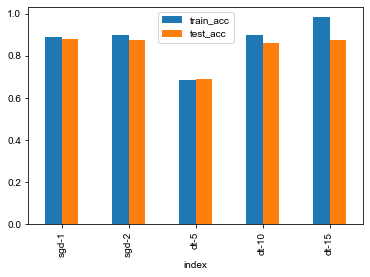

In [190]:
plt.figure(figsize=(7, 6))
plt_df.plot(kind='bar')
plt.show()